In [ ]:
# Usual imports for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt

# Machine learning libraries
from sklearn.ensemble import RandomForestClassifier

# Confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

#No System Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1 = pd.read_csv("../resources/stacked_etf_files/ticker_data_stacked1.csv")

In [265]:
df1.shape

(10549, 32)

In [266]:
df1.info(), df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10549 entries, 0 to 10548
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     10549 non-null  object 
 1   Ticker                   10549 non-null  object 
 2   Open                     10549 non-null  float64
 3   High                     10549 non-null  float64
 4   Low                      10549 non-null  float64
 5   Close                    10549 non-null  float64
 6   Volume                   10549 non-null  int64  
 7   Dividends                10549 non-null  float64
 8   Stock Splits             10549 non-null  float64
 9   Capital Gains            9042 non-null   float64
 10  Price_Movement           10549 non-null  float64
 11  Price_Movement_Pct       10549 non-null  float64
 12  Year                     10549 non-null  int64  
 13  Month                    10549 non-null  int64  
 14  Day                   

(None,
          Date Ticker        Open        High         Low       Close  \
 0  2020-01-02    QQQ  206.881922  208.580215  206.476651  208.580215   
 1  2020-01-03    QQQ  205.820530  207.914436  205.801227  206.669662   
 2  2020-01-06    QQQ  205.048539  208.030183  204.797662  208.001236   
 3  2020-01-07    QQQ  208.078433  208.560901  207.316142  207.972290   
 4  2020-01-08    QQQ  207.943356  210.490782  207.615282  209.535492   
 
      Volume  Dividends  Stock Splits  Capital Gains  ...  Close_lag14  \
 0  30969400        0.0           0.0            0.0  ...          0.0   
 1  27518900        0.0           0.0            0.0  ...          0.0   
 2  21655300        0.0           0.0            0.0  ...          0.0   
 3  22139300        0.0           0.0            0.0  ...          0.0   
 4  26397300        0.0           0.0            0.0  ...          0.0   
 
    Close_lag21  Close_lag28  Close_lag365  Month_Sin  Month_Cos  \
 0          0.0          0.0           

In [267]:
df1['Ticker_Code'], ticker_uniques = pd.factorize(df1['Ticker'])
df1['Ticker_Code'].value_counts(sort=True)

Ticker_Code
0    1507
1    1507
2    1507
3    1507
4    1507
5    1507
6    1507
Name: count, dtype: int64

In [ ]:
df2 = pd.read_csv(r"../resources/raw_files/fred/fred_macro_data.csv")

In [269]:
df2.shape

(2190, 47)

In [270]:
df2.info(), df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 47 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date                                       2190 non-null   object 
 1   GDP                                        2190 non-null   float64
 2   CPI_Inflation                              2190 non-null   float64
 3   Average_price_of_eggs                      2190 non-null   float64
 4   Average_price_of_electricity               2190 non-null   float64
 5   Leading_Index_for_US                       2190 non-null   float64
 6   NBER_Recession_Indicator                   2190 non-null   float64
 7   Producer_Price_Index                       2190 non-null   float64
 8   5-Year_Breakeven_Inflation                 2190 non-null   float64
 9   Natural_Rate__of_Unemployment_(est.)       2190 non-null   float64
 10  Civilian_Labor_Force_Par

(None,
          Date        GDP  CPI_Inflation  Average_price_of_eggs  \
 0  2020-01-03  21751.238        259.127                  1.461   
 1  2020-01-04  21751.238        259.127                  1.461   
 2  2020-01-05  21751.238        259.127                  1.461   
 3  2020-01-06  21751.238        259.127                  1.461   
 4  2020-01-07  21751.238        259.127                  1.461   
 
    Average_price_of_electricity  Leading_Index_for_US  \
 0                         0.134                  1.57   
 1                         0.134                  1.57   
 2                         0.134                  1.57   
 3                         0.134                  1.57   
 4                         0.134                  1.57   
 
    NBER_Recession_Indicator  Producer_Price_Index  5-Year_Breakeven_Inflation  \
 0                       0.0                 199.3                        1.85   
 1                       0.0                 199.3                        1

In [271]:
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')

In [272]:
ml = df2.merge(df1, on="Date", how="inner")
ml1 = df1.copy()
ml1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10549 entries, 0 to 10548
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     10549 non-null  datetime64[ns]
 1   Ticker                   10549 non-null  object        
 2   Open                     10549 non-null  float64       
 3   High                     10549 non-null  float64       
 4   Low                      10549 non-null  float64       
 5   Close                    10549 non-null  float64       
 6   Volume                   10549 non-null  int64         
 7   Dividends                10549 non-null  float64       
 8   Stock Splits             10549 non-null  float64       
 9   Capital Gains            9042 non-null   float64       
 10  Price_Movement           10549 non-null  float64       
 11  Price_Movement_Pct       10549 non-null  float64       
 12  Year                     10549 n

In [273]:
ml.set_index('Date', inplace=True)
ml1.set_index('Date', inplace=True)
ml.info(), ml1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10542 entries, 2020-01-03 to 2025-12-30
Data columns (total 78 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   GDP                                        10542 non-null  float64
 1   CPI_Inflation                              10542 non-null  float64
 2   Average_price_of_eggs                      10542 non-null  float64
 3   Average_price_of_electricity               10542 non-null  float64
 4   Leading_Index_for_US                       10542 non-null  float64
 5   NBER_Recession_Indicator                   10542 non-null  float64
 6   Producer_Price_Index                       10542 non-null  float64
 7   5-Year_Breakeven_Inflation                 10542 non-null  float64
 8   Natural_Rate__of_Unemployment_(est.)       10542 non-null  float64
 9   Civilian_Labor_Force_Participation         10542 non-null  float64
 10  BBB_C

(None, None)

In [274]:
ml.shape, ml1.shape

((10542, 78), (10549, 32))

In [275]:
drop_column_list = ['Ticker', 'Price_Movement_Category', 'Price_Movement', 'Price_Movement_Pct', 'Price_Movement_Code']

In [276]:
X_class = ml.drop(drop_column_list, axis=1) 
y_class = ml['Price_Movement_Code']

X_class1 = ml1.drop(drop_column_list, axis=1) 
y_class1 = ml1['Price_Movement_Code']

In [277]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_class1, y_class1, test_size=0.2, random_state=42
)

In [278]:
# Train baseline Random Forest
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)
rf_baseline1 = RandomForestClassifier(random_state=42)
rf_baseline1.fit(X_train1, y_train1)

# Predictions
y_pred = rf_baseline.predict(X_test)
y_pred1 = rf_baseline1.predict(X_test1)
# Performance
accuracy = accuracy_score(y_test, y_pred)
accuracy1 = accuracy_score(y_test1, y_pred1)

In [279]:
accuracy * 100, accuracy1 * 100

(87.8615457562826, 65.59241706161137)

In [305]:
# Detailed metrics
print('Results for model with macroeconomic features:')
print()
print(classification_report(y_test, y_pred, target_names=['High', 'Same', 'Low']))
print()
print('Results for model without macroeconomic features (for comparison):')
print()
print(classification_report(y_test1, y_pred1, target_names=['High', 'Same', 'Low']))

Results for model with macroeconomic features:

              precision    recall  f1-score   support

        High       0.88      0.91      0.89      1128
        Same       0.00      0.00      0.00        10
         Low       0.88      0.86      0.87       971

    accuracy                           0.88      2109
   macro avg       0.59      0.59      0.59      2109
weighted avg       0.87      0.88      0.88      2109


Results for model without macroeconomic features (for comparison):

              precision    recall  f1-score   support

        High       0.65      0.73      0.69      1095
        Same       0.00      0.00      0.00         6
         Low       0.66      0.58      0.62      1009

    accuracy                           0.66      2110
   macro avg       0.44      0.44      0.44      2110
weighted avg       0.65      0.66      0.65      2110



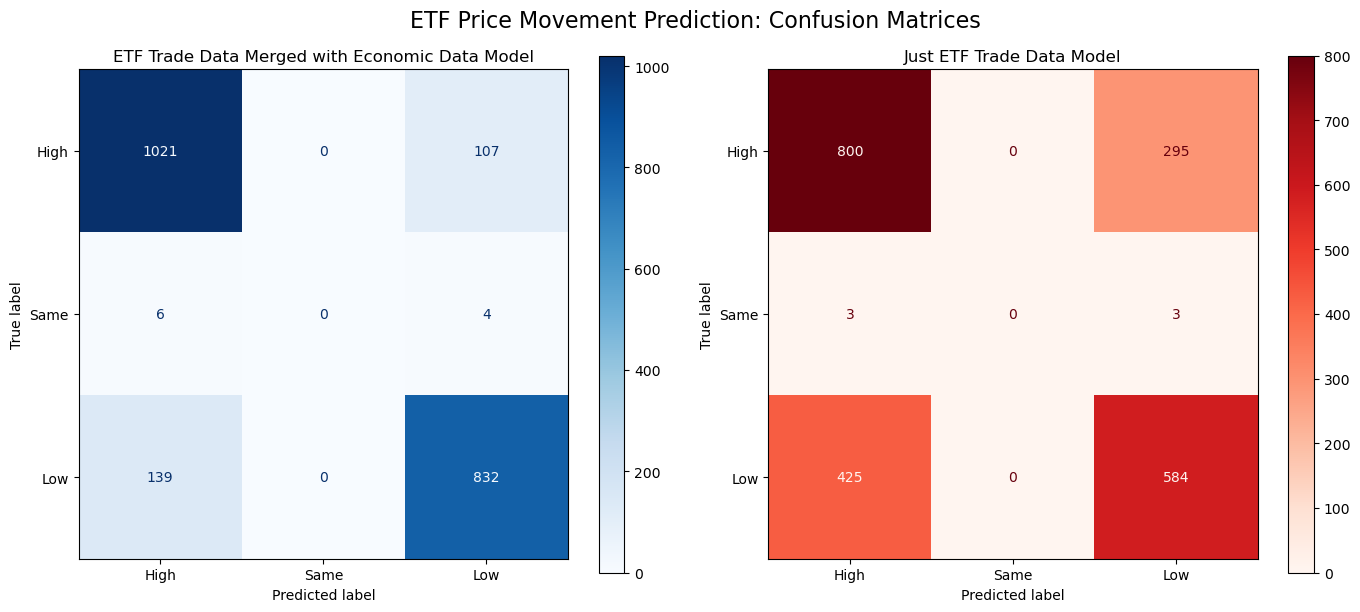

In [281]:
# Assume y_test1, y_pred1 for baseline; y_test2, y_pred2 for model 2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Baseline
cm1 = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(cm1, display_labels=['High', 'Same', 'Low'])
disp1.plot(ax=ax1, cmap='Blues', values_format='.0f')
ax1.set_title('ETF Trade Data Merged with Economic Data Model')

# Model 2
cm2 = confusion_matrix(y_test1, y_pred1)
disp2 = ConfusionMatrixDisplay(cm2, display_labels=['High', 'Same', 'Low'])
disp2.plot(ax=ax2, cmap='Reds',values_format='.0f')
ax2.set_title('Just ETF Trade Data Model')

plt.suptitle('ETF Price Movement Prediction: Confusion Matrices', fontsize=16)
plt.tight_layout()
plt.show()

In [282]:
rf_baseline.feature_importances_, rf_baseline1.feature_importances_

(array([1.23992999e-03, 3.28376570e-03, 4.12256010e-03, 3.24752319e-03,
        3.73407725e-05, 1.06126574e-04, 3.80901271e-03, 3.13503608e-02,
        1.79069118e-03, 2.61730074e-03, 2.49817428e-02, 1.84704370e-03,
        2.96496722e-03, 4.41771562e-03, 3.94032583e-03, 2.78654007e-03,
        2.94555487e-02, 3.02629186e-02, 2.95232533e-02, 2.66454672e-03,
        3.19921964e-03, 4.60650462e-03, 2.09195272e-03, 2.66004933e-02,
        2.78719140e-02, 3.16568896e-02, 5.42646690e-03, 4.36062782e-02,
        4.11507651e-03, 4.24835316e-03, 4.66498758e-03, 1.67672985e-02,
        4.92704318e-03, 3.42969728e-02, 4.25551017e-03, 4.32704795e-03,
        4.28974997e-03, 5.39619920e-03, 5.55658206e-02, 1.69936541e-02,
        5.27093720e-03, 2.98439572e-02, 2.80979511e-02, 3.59386043e-03,
        2.13832462e-02, 3.51955027e-02, 1.94610128e-02, 1.78328852e-02,
        1.79199735e-02, 2.09132865e-02, 2.37589385e-02, 7.82986843e-04,
        0.00000000e+00, 0.00000000e+00, 6.34230552e-04, 3.637782

In [283]:
X_class.columns, X_class1.columns

(Index(['GDP', 'CPI_Inflation', 'Average_price_of_eggs',
        'Average_price_of_electricity', 'Leading_Index_for_US',
        'NBER_Recession_Indicator', 'Producer_Price_Index',
        '5-Year_Breakeven_Inflation', 'Natural_Rate__of_Unemployment_(est.)',
        'Civilian_Labor_Force_Participation', 'BBB_Corporate_Spread',
        'Real_Gross_Domestic_Product', 'Personal_Consumption_Expenditures',
        'Industrial_Production_Index', 'Recession_Probabilities',
        'Core_CPI_(ex_Food/Energy)', '10-Year_Breakeven_Inflation',
        '10-Year_TIPS_Yield', '10-Year_Treasury_Yield', 'Unemployment_Rate',
        'Nonfarm_Payrolls', 'Job_Openings_(JOLTS)', 'Effective_Fed_Funds_Rate',
        '2-Year_Treasury_Yield', '10Y-2Y_Treasury_Spread', 'High_Yield_OAS',
        'Equity_Mkt_Vol:_Macro_News_Tracker', 'Equity_Market_Uncertainty_Index',
        'U_Mich_Inflation_Expectations', 'Housing_Starts:_Total',
        'New_Private_Housing_Units_Authorized', '30-Year_Fixed_Mortgage_Rate',
 

In [284]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_class.columns,
    'importance': rf_baseline.feature_importances_,
})

feature_importance1= pd.DataFrame({
    'feature1': X_class1.columns,
    'importance1': rf_baseline1.feature_importances_,
})

feature_importance, feature_importance1

(                         feature  importance
 0                            GDP    0.001240
 1                  CPI_Inflation    0.003284
 2          Average_price_of_eggs    0.004123
 3   Average_price_of_electricity    0.003248
 4           Leading_Index_for_US    0.000037
 ..                           ...         ...
 68                     Month_Sin    0.003522
 69                     Month_Cos    0.002997
 70                 Dayofweek_Sin    0.017652
 71                 Dayofweek_Cos    0.014783
 72                   Ticker_Code    0.010529
 
 [73 rows x 2 columns],
          feature1  importance1
 0            Open     0.051071
 1            High     0.047243
 2             Low     0.048146
 3           Close     0.064494
 4          Volume     0.070005
 5       Dividends     0.002565
 6    Stock Splits     0.000000
 7   Capital Gains     0.000000
 8            Year     0.023113
 9           Month     0.019691
 10            Day     0.074585
 11    Day_of_Year     0.081211
 12   

In [285]:
feature_importance = feature_importance.sort_values('importance', ascending=False)
feature_importance1 = feature_importance1.sort_values('importance1', ascending=False)
feature_importance, feature_importance1

(                            feature  importance
 38      CBOE_Volatility_Index (VIX)    0.055566
 27  Equity_Market_Uncertainty_Index    0.043606
 45              WTI_Crude_Oil_Price    0.035196
 33    ON_RRP_(Reverse_Repo)_Balance    0.034297
 56                              Day    0.034062
 ..                              ...         ...
 54                             Year    0.000634
 5          NBER_Recession_Indicator    0.000106
 4              Leading_Index_for_US    0.000037
 53                    Capital Gains    0.000000
 52                     Stock Splits    0.000000
 
 [73 rows x 2 columns],
          feature1  importance1
 11    Day_of_Year     0.081211
 10            Day     0.074585
 4          Volume     0.070005
 3           Close     0.064494
 14     Close_lag1     0.052763
 20    Close_lag28     0.051500
 0            Open     0.051071
 16     Close_lag5     0.050984
 15     Close_lag3     0.050524
 21   Close_lag365     0.050474
 18    Close_lag14     0.050413
 1

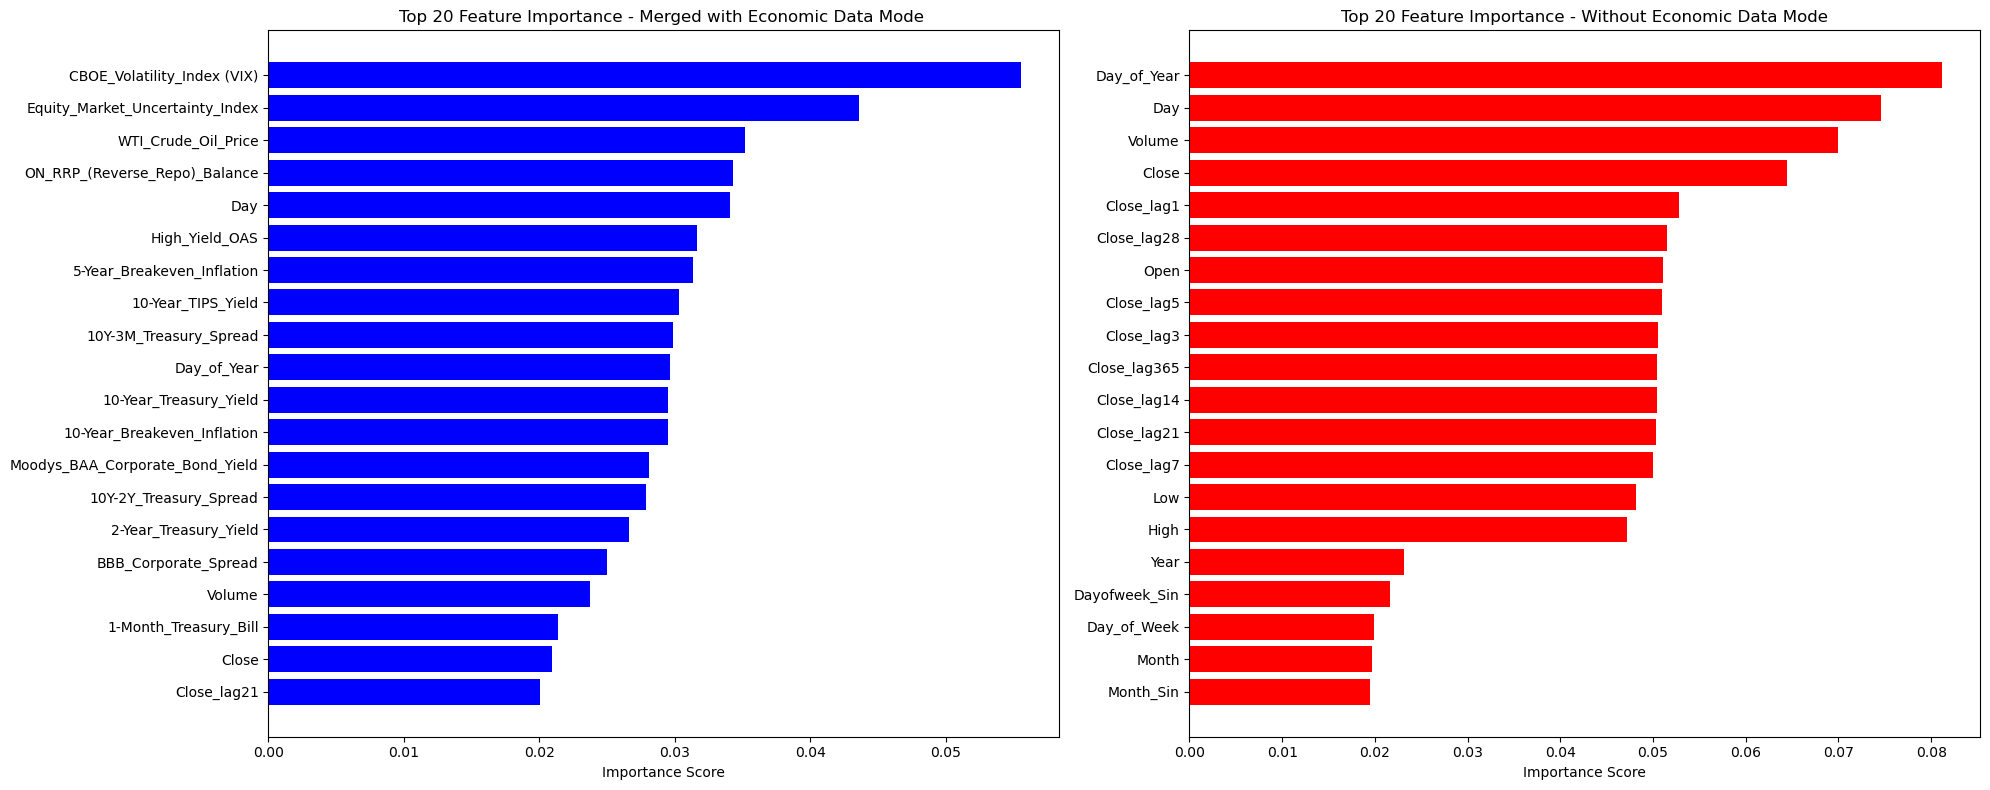

In [304]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

top = feature_importance.head(20)
ax1.barh(range(len(top)), top['importance'].values, color='blue')
ax1.set_yticks(range(len(top)))
ax1.set_yticklabels(top['feature'].values)
ax1.set_xlabel('Importance Score')
ax1.set_title('Top 20 Feature Importance - Merged with Economic Data Mode ')
ax1.invert_yaxis()

top1 = feature_importance1.head(20)
ax2.barh(range(len(top1)), top1['importance1'].values, color='red')
ax2.set_yticks(range(len(top1)))
ax2.set_yticklabels(top1['feature1'].values)
ax2.set_xlabel('Importance Score')
ax2.set_title('Top 20 Feature Importance - Without Economic Data Mode')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

In [287]:
# Select top features
top_n = 10
selected_features = feature_importance.head(top_n)['feature'].tolist()

top_n1= 10
selected_features1 = feature_importance1.head(top_n1)['feature1'].tolist()

selected_features, selected_features1

(['CBOE_Volatility_Index (VIX)',
  'Equity_Market_Uncertainty_Index',
  'WTI_Crude_Oil_Price',
  'ON_RRP_(Reverse_Repo)_Balance',
  'Day',
  'High_Yield_OAS',
  '5-Year_Breakeven_Inflation',
  '10-Year_TIPS_Yield',
  '10Y-3M_Treasury_Spread',
  'Day_of_Year'],
 ['Day_of_Year',
  'Day',
  'Volume',
  'Close',
  'Close_lag1',
  'Close_lag28',
  'Open',
  'Close_lag5',
  'Close_lag3',
  'Close_lag365'])

In [288]:
# Train model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train)

y_pred_selected = rf_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

In [289]:
accuracy_selected * 100


88.3357041251778

In [290]:
(accuracy_selected - accuracy) * 100

0.4741583688952056

In [291]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grid (simple)
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

In [292]:
# Grid search with cross-validation
rf_grid = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    rf_grid, param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_selected, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy', verbose=1)

In [293]:
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 500}

In [294]:
grid_search.best_score_

np.float64(0.8746591231108589)

In [295]:
# Test the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_selected)
accuracy_best = accuracy_score(y_test, y_pred_best)

In [296]:
accuracy, accuracy_best

(0.878615457562826, 0.883357041251778)

In [297]:
accuracy_selected

0.883357041251778

In [298]:
accuracy_best

0.883357041251778

In [299]:
(accuracy_best - accuracy)*100

0.4741583688952056

In [300]:
# Final classification report
print(classification_report(y_test, y_pred_best, target_names=['High', 'Same', 'Low']))

              precision    recall  f1-score   support

        High       0.89      0.90      0.89      1128
        Same       0.00      0.00      0.00        10
         Low       0.88      0.87      0.88       971

    accuracy                           0.88      2109
   macro avg       0.59      0.59      0.59      2109
weighted avg       0.88      0.88      0.88      2109



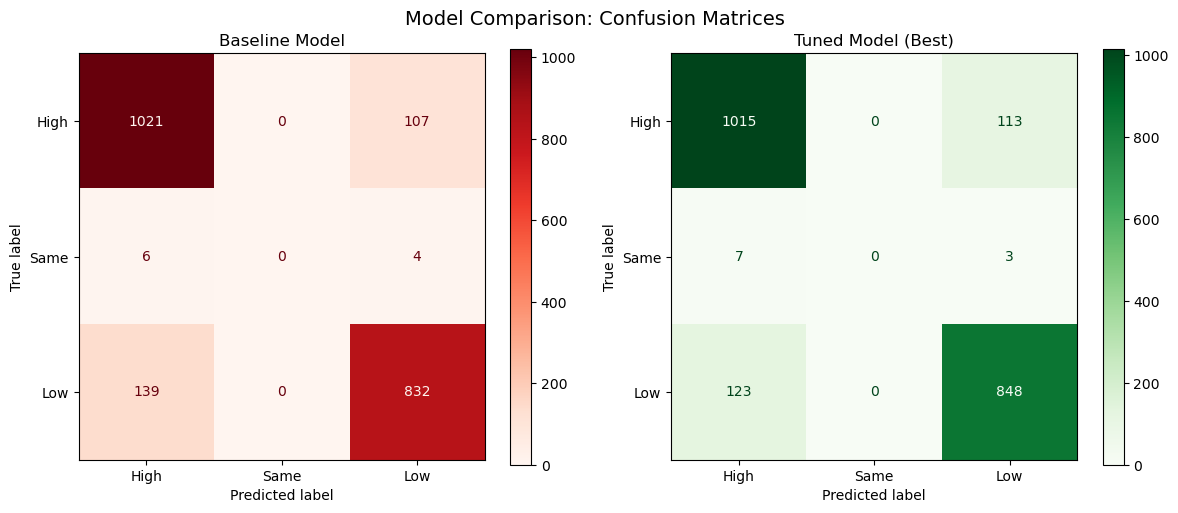

In [301]:
# Final confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Baseline
cm_baseline = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_baseline, 
                                display_labels=['High', 'Same', 'Low'])
disp1.plot(ax=axes[0], cmap='Reds')
axes[0].set_title('Baseline Model')

# Best model
cm_best = confusion_matrix(y_test, y_pred_best)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_best, 
                                display_labels=['High', 'Same', 'Low'])
disp2.plot(ax=axes[1], cmap='Greens')
axes[1].set_title('Tuned Model (Best)')

plt.suptitle('Model Comparison: Confusion Matrices', fontsize=14)
plt.tight_layout()
plt.show()

In [302]:
# Feature importance from best model
final_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': best_model.feature_importances_
})

final_importance = final_importance.sort_values('importance', ascending=False)
final_importance

,feature,importance
0,CBOE_Volatility_Index (VIX),0.139667
1,Equity_Market_Uncertainty_Index,0.117569
2,WTI_Crude_Oil_Price,0.105478
3,ON_RRP_(Reverse_Repo)_Balance,0.098541
5,High_Yield_OAS,0.097961
9,Day_of_Year,0.093135
8,10Y-3M_Treasury_Spread,0.091390
7,10-Year_TIPS_Yield,0.088452
6,5-Year_Breakeven_Inflation,0.084010
4,Day,0.083797


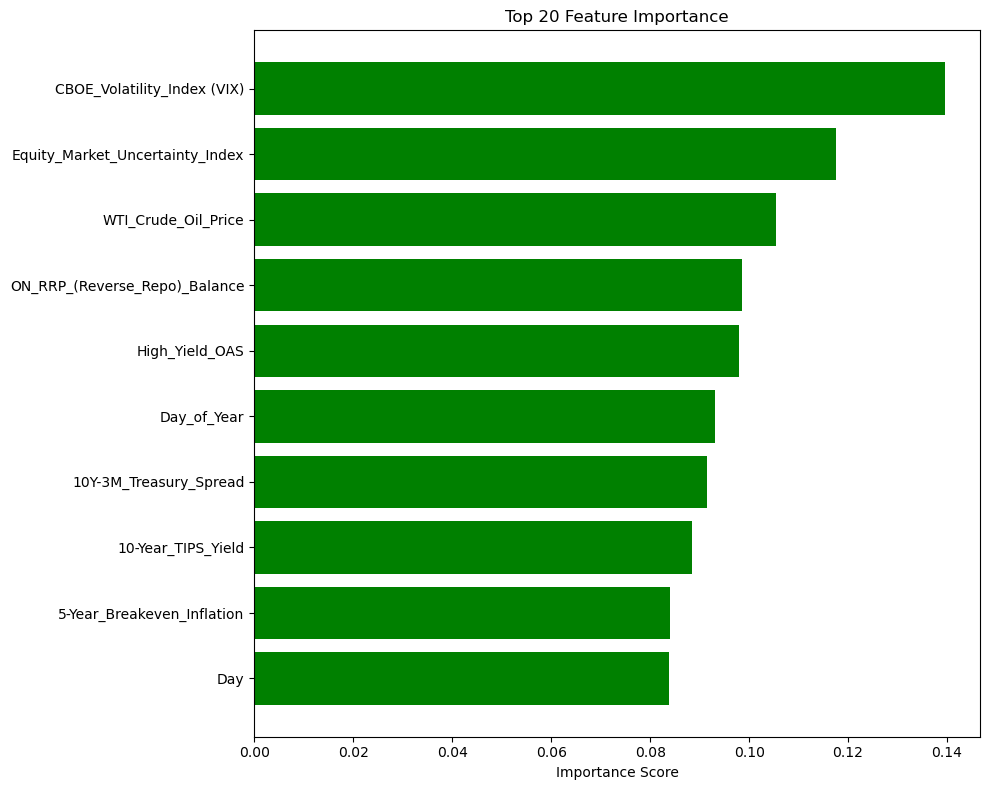

In [303]:
# Visualise feature importance
plt.figure(figsize=(10, 8))
top_features = final_importance.head(10)
plt.barh(range(len(top_features)), top_features['importance'].values, color = 'green')
plt.yticks(range(len(top_features)), top_features['feature'].values)
plt.xlabel('Importance Score')
plt.title('Top 20 Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()